In [ ]:
import sys
!{sys.executable} -m pip install netCDF4 h5netcdf
!{sys.executable} -m pip install dask

import xarray as xr
import pandas as pd
import glob
import numpy as np
import matplotlib.pyplot as plt



  Using cached netcdf4-1.7.4-cp311-abi3-win_amd64.whl.metadata (2.1 kB)
Using cached netcdf4-1.7.4-cp311-abi3-win_amd64.whl (21.3 MB)



[notice] A new release of pip is available: 25.0.1 -> 26.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [ ]:
# List files
rzsm_files = sorted(glob.glob("./datasets/copernicus/C3S-RZSM-L3S-RZSMV-DEKADAL-*.nc"))
ssm_files  = sorted(glob.glob("./datasets/copernicus/C3S-SOILMOISTURE-L3S-SSMV-COMBINED-*.nc"))

# Open with small chunks
rzsm_ds = xr.open_mfdataset(rzsm_files, combine='by_coords', chunks={'time': 1, 'lat': 50, 'lon': 50})
ssm_ds  = xr.open_mfdataset(ssm_files, combine='by_coords', chunks={'time': 1, 'lat': 50, 'lon': 50})

# Merge datasets
combined_ds = xr.merge([ssm_ds, rzsm_ds])



C:\Users\user\AppData\Local\Temp\ipykernel_16448\3226729969.py:9: UserWarning: The specified chunks separate the stored chunks along dimension "lat" starting at index 50. This could degrade performance. Instead, consider rechunking after loading.
  rzsm_ds = xr.open_mfdataset(rzsm_files, combine='by_coords', chunks={'time': 1, 'lat': 50, 'lon': 50})
C:\Users\user\AppData\Local\Temp\ipykernel_16448\3226729969.py:9: UserWarning: The specified chunks separate the stored chunks along dimension "lon" starting at index 50. This could degrade performance. Instead, consider rechunking after loading.
  rzsm_ds = xr.open_mfdataset(rzsm_files, combine='by_coords', chunks={'time': 1, 'lat': 50, 'lon': 50})
C:\Users\user\AppData\Local\Temp\ipykernel_16448\3226729969.py:9: UserWarning: The specified chunks separate the stored chunks along dimension "lat" starting at index 50. This could degrade performance. Instead, consider rechunking after loading.
  rzsm_ds = xr.open_mfdataset(rzsm_files, combine

In [62]:
print("Earliest date:", ssm_ds.time.min().values)
print("Latest date:", ssm_ds.time.max().values)


Earliest date: 2021-01-01T00:00:00.000000000
Latest date: 2024-12-21T00:00:00.000000000


In [40]:
print(len(rzsm_files))
print(len(ssm_files))

144
144


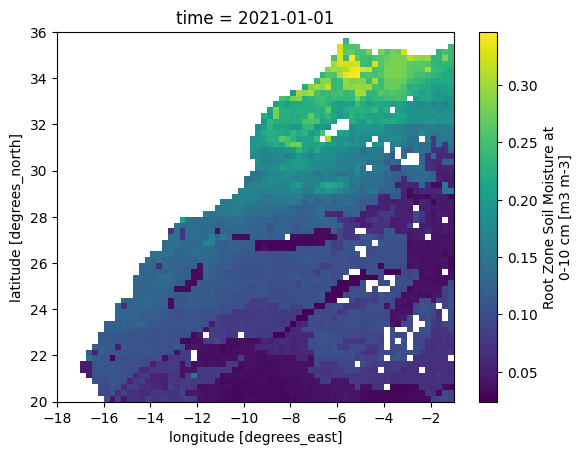

In [43]:
morocco_2021 = combined_ds.sel(
    time="2021-01-01",
    lat=slice(36,20),
    lon=slice(-18,-1)
)

morocco_2021["rzsm_1"].plot()


In [45]:
morocco_ds = combined_ds.sel(
    lat=slice(36, 21),     
    lon=slice(-17, -1)
)

print(morocco_ds)






<xarray.Dataset> Size: 25MB
Dimensions:     (time: 144, lat: 60, lon: 64)
Coordinates:
  * time        (time) datetime64[ns] 1kB 2021-01-01 2021-01-11 ... 2024-12-21
  * lat         (lat) float32 240B 35.88 35.62 35.38 35.12 ... 21.62 21.38 21.12
  * lon         (lon) float32 256B -16.88 -16.62 -16.38 ... -1.625 -1.375 -1.125
Data variables:
    sm          (time, lat, lon) float32 2MB dask.array<chunksize=(1, 34, 48), meta=np.ndarray>
    sensor      (time, lat, lon) int32 2MB dask.array<chunksize=(1, 34, 48), meta=np.ndarray>
    freqbandID  (time, lat, lon) int16 1MB dask.array<chunksize=(1, 34, 48), meta=np.ndarray>
    nobs        (time, lat, lon) float32 2MB dask.array<chunksize=(1, 34, 48), meta=np.ndarray>
    rzsm_1      (time, lat, lon) float32 2MB dask.array<chunksize=(1, 34, 48), meta=np.ndarray>
    rzsm_2      (time, lat, lon) float32 2MB dask.array<chunksize=(1, 34, 48), meta=np.ndarray>
    rzsm_3      (time, lat, lon) float32 2MB dask.array<chunksize=(1, 34, 48), meta=

In [ ]:
morocco_df = morocco_ds.to_dataframe().reset_index()
print(morocco_df.shape)


(552960, 15)


In [ ]:
morocco_df = morocco_df[morocco_df["sm"].notna()]
print(morocco_df.head(10))

print("Latitude range:", float(morocco_ds.lat.min()), "to", float(morocco_ds.lat.max()))
print("Longitude range:", float(morocco_ds.lon.min()), "to", float(morocco_ds.lon.max()))

#check for missing values
print("Missing values in sm:", morocco_df["sm"].isna().sum())
print("Missing values in rzsm_1:", morocco_df["rzsm_1"].isna().sum())
print("Missing values in rzsm_2:", morocco_df["rzsm_2"].isna().sum())
print("Missing values in rzsm_3:", morocco_df["rzsm_3"].isna().sum())






          time     lat    lon        sm  sensor  freqbandID  nobs    rzsm_1  \
109 2021-01-01  35.625 -5.625  0.264434   21600         113   7.0  0.233818   
172 2021-01-01  35.375 -5.875  0.340521   54368          83   9.0  0.326788   
173 2021-01-01  35.375 -5.625  0.279775   54368          83   8.0  0.257777   
174 2021-01-01  35.375 -5.375  0.274558   21600         113   8.0  0.255524   
175 2021-01-01  35.375 -5.125  0.268407   21568          65   3.0  0.258646   
191 2021-01-01  35.375 -1.125  0.274933   53280          82   4.0  0.243737   
236 2021-01-01  35.125 -5.875  0.344707   54368          83   9.0  0.326942   
237 2021-01-01  35.125 -5.625  0.287305   54368          83   8.0  0.264844   
238 2021-01-01  35.125 -5.375  0.289638   54368          83   7.0  0.267271   
239 2021-01-01  35.125 -5.125  0.273507   54368          83   7.0  0.250414   

       rzsm_2    rzsm_3   rzsm_1m  nobs_1  nobs_2  nobs_3  nobs_1m  
109  0.221145  0.183893  0.200061    10.0    10.0    10.0    

In [58]:
print("Start date:", str(morocco_ds.time.min().values))
print("End date:", str(morocco_ds.time.max().values))


Start date: 2021-01-01T00:00:00.000000000
End date: 2024-12-21T00:00:00.000000000


Text(0.5, 0, 'Longitude')

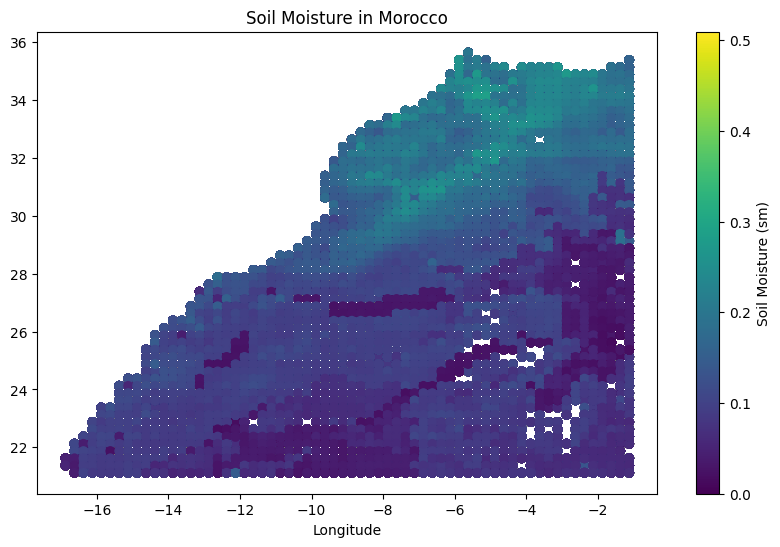

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(morocco_df["lon"], morocco_df["lat"], c=morocco_df["sm"], cmap="viridis")
plt.colorbar(label="Soil Moisture (sm)")
plt.title("Soil Moisture in Morocco (2026)")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()